
###Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

###data collection

In [4]:
dataset=pd.read_csv('/content/Final Project 1.csv')

In [5]:
dataset.shape

(1599, 12)

In [6]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

###data analysis and visulalization


In [8]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


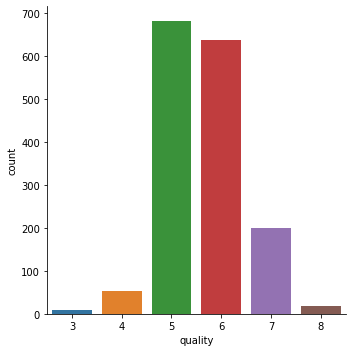

In [9]:
sns.catplot(x='quality', data = dataset,kind= 'count')

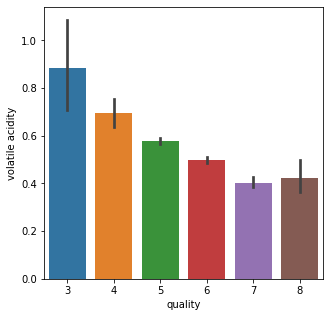

In [10]:
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data = dataset)

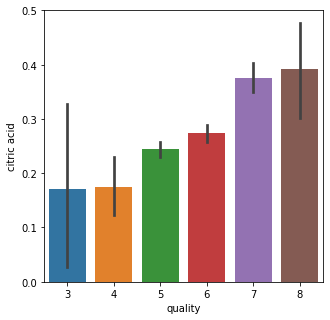

In [11]:
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data = dataset)

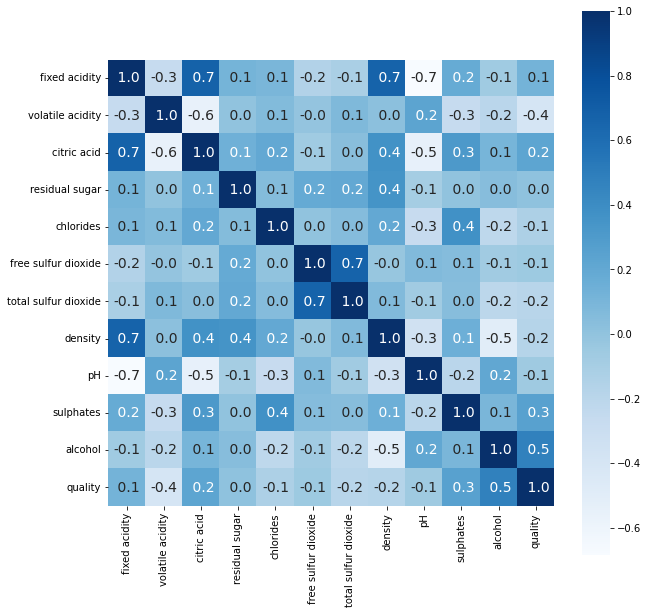

In [12]:
plot= plt.figure(figsize=(10,10))
correlation=dataset.corr()                                      #to check correlation between columns
sns.heatmap(correlation, annot=True, cbar=True, square=True, fmt=' .1f', annot_kws={'size':14}, cmap='Blues')

###data preprocessing

In [13]:
x= dataset.drop('quality',axis=1)
y= dataset['quality'].apply(lambda y_values: 1 if y_values>=7 else 0)

In [14]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


###train & test  split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=3) 

###model training

In [19]:
model =RandomForestClassifier()

model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

###accuracy score

In [48]:
x_test[100:101]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1158,6.7,0.41,0.43,2.8,0.076,22.0,54.0,0.99572,3.42,1.16,10.6


In [20]:
x_pred = model.predict(x_test)
test_data_accuracy = accuracy_score(x_pred , y_test)
print("accuracy:  ", test_data_accuracy)

accuracy:   0.934375


###building a predictive systeam

In [51]:

data = (6.7	,0.41	,0.43,	2.8,	0.076	,22.0	,54.0	,0.99572,	3.42,	1.16,	10.6)

input_data = np.asarray(data)
input_data_reshaped = input_data.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==1):
  print("quality of wine is good (red wine)")
else:
  print("quality of wine is bad")



[0]
quality of wine is bad
